In [1]:
%run init.ipy

from lib import constants

## Get some test data from VTRFormants ***TEST*** set

In [30]:
import random
from vtr.prior import formant
from lib import timit

def rand_triple():
    vtr_root = timit.test_set(timit.VTRFORMANTS)
    timit_root = timit.test_set(timit.TIMIT)
    l = list(timit.yield_file_triples(vtr_root, timit_root))
    return random.choice(l)

fb_file, phn_file, wav_file = rand_triple()

In [31]:
d, fs = formant.read_wav_file_and_normalize(wav_file)
t = np.arange(len(d))/fs

from lib import klatt
klatt.play(t*1000., d)

**********aa**********


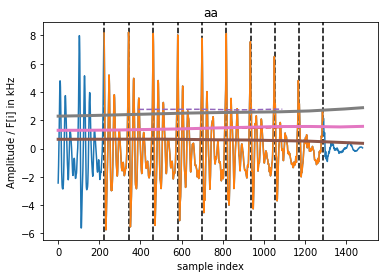

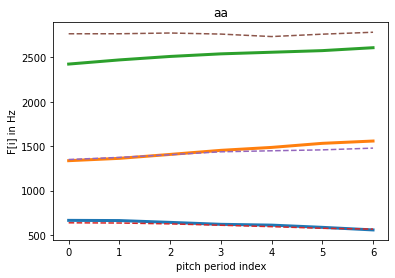

**********eh**********


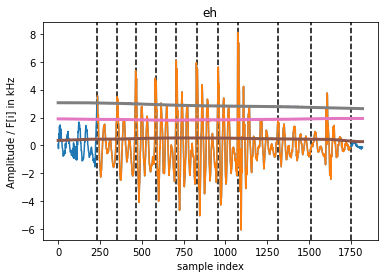

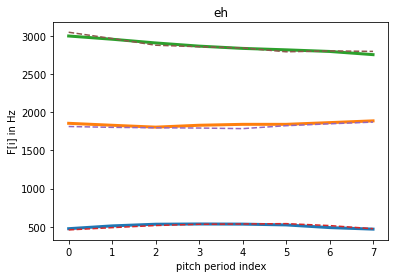

**********eh**********


/home/marnix/thesis/py/vtr/prior/formant.py:90: UserWarning: /home/marnix/thesis/py/../data/TIMIT/TEST/DR7/MGRT0/SX100.WAV: Discarding vowel `ix` segment at sample indices 11120:11738: segment too short for Praat's pulse estimation algorithm: To analyse this Sound, “minimum pitch” must not be less than 77.66990291262135 Hz.
Sound: pitch analysis not performed.
  warnings.warn(


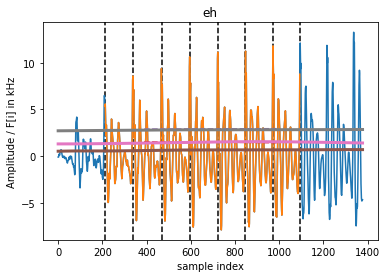

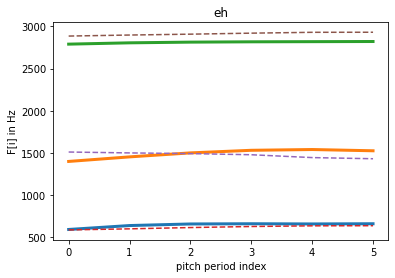

**********ah**********


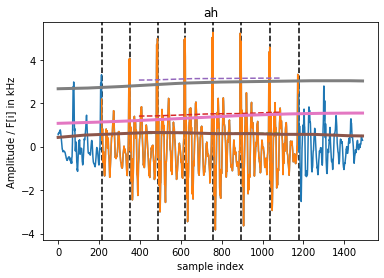

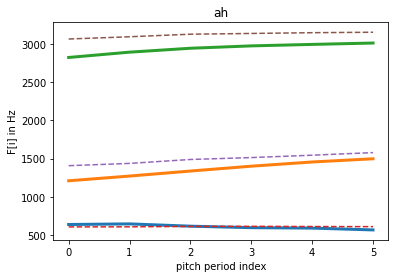

**********axr**********


/home/marnix/thesis/py/vtr/prior/formant.py:90: UserWarning: /home/marnix/thesis/py/../data/TIMIT/TEST/DR7/MGRT0/SX100.WAV: Discarding vowel `ax` segment at sample indices 24563:25560: segment too short for Praat's pulse estimation algorithm: No times in PointProcess.
PointProcess "untitled_untitled": not converted to Matrix.
  warnings.warn(


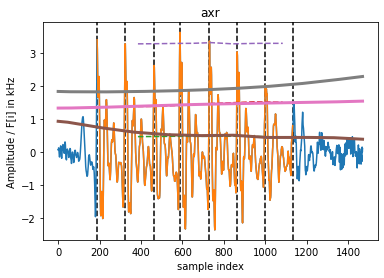

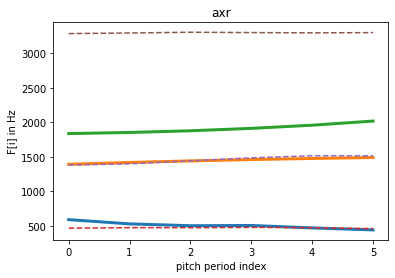

**********iy**********


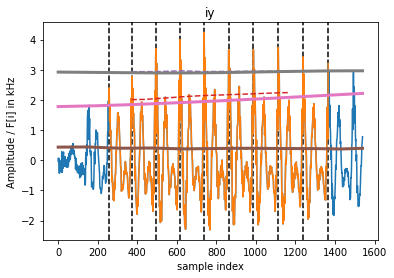

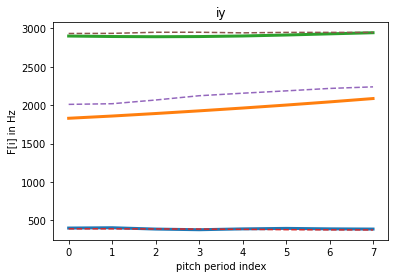

**********ih**********


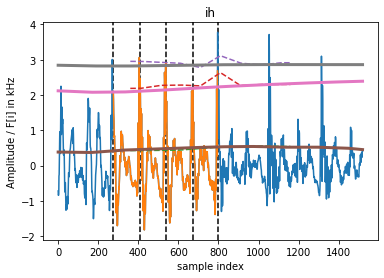

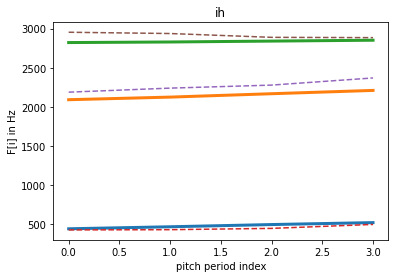

**********ux**********


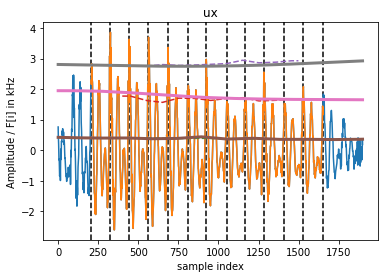

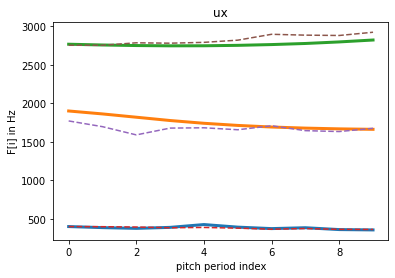

/home/marnix/thesis/py/vtr/prior/formant.py:90: UserWarning: /home/marnix/thesis/py/../data/TIMIT/TEST/DR7/MGRT0/SX100.WAV: Discarding vowel `ow` segment at sample indices 44113:46624: Estimated Praat periods not within `{min|max}_period_length_msec`: [7.9375 7.875  7.875  7.875  7.875  7.9375 7.9375 8.     8.125  8.125
 8.0625 8.25   7.5625 4.1875 1.9375 2.75   2.25   2.     2.375  2.25
 2.25   2.125  2.0625]
  warnings.warn(
/home/marnix/thesis/py/vtr/prior/formant.py:90: UserWarning: /home/marnix/thesis/py/../data/TIMIT/TEST/DR7/MGRT0/SX100.WAV: Discarding vowel `iy` segment at sample indices 48588:50389: Estimated Praat periods not within `{min|max}_period_length_msec`: [2.1875 2.3125 2.     2.1875 5.375  2.375  2.4375 3.0625 2.4375 2.4375
 2.4375 2.375  2.6875 2.4375 4.8125]
  warnings.warn(


In [32]:
from lib import constants

for T_praat, F_true_periods, F_praat_periods, context in formant.yield_training_data(
        fb_file, phn_file, wav_file, return_full=True
    ):
    vowel = context['vowel']
    print("*"*10 + vowel + "*"*10)
    
    # Plot pulse estimates
    pulse_idx = context['pulse_idx']
    for pi in pulse_idx:
        axvline(pi, ls="--", color="black")
    first, last = pulse_idx[0], pulse_idx[-1]
    
    # Plot waveform
    segment = context['segment']
    plot(segment)
    plot(range(first, last), segment[first:last])
    
    # Plot formant tracks
    plot(context['F_praat_tracks']/1000, "--")
    plot(context['F_true_tracks']/1000, lw=3)
    ylabel("Amplitude / F[i] in kHz")
    xlabel("sample index")
    title(vowel)
    show()
    
    # Plot the distilled training data
    plot(F_true_periods, lw=3)
    plot(F_praat_periods, "--")
    ylabel("F[i] in Hz")
    xlabel("pitch period index")
    title(vowel)
    show()

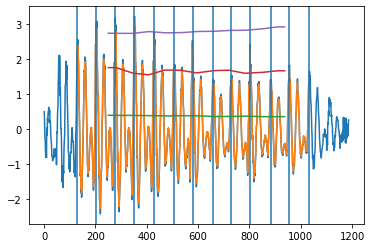

{'fulldata': array([ 0.50221794,  0.38402314,  0.0772603 , ..., -0.18704388,
        -0.07515514,  0.26516573]),
 'fullt': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.184e+02, 1.185e+02,
        1.186e+02]),
 'fs': 10000.0,
 'd': array([ 1.82062847,  2.12823236,  2.38724878,  1.98870845,  1.96008135,
         1.72701612,  1.16927776,  0.67233766,  0.47048145,  0.1165405 ,
        -0.29615253, -0.80439418, -1.23678747, -1.15811015, -1.60167492,
        -1.69354948, -1.52549007, -1.80950783, -1.57912742, -1.3183686 ,
        -1.02129335, -0.72052813, -0.57392965, -0.17803656,  0.31355026,
         0.5436334 ,  0.9431711 ,  1.5595763 ,  1.53096318,  1.73836367,
         1.92541099,  1.77472328,  1.8405634 ,  1.62948215,  1.25219693,
         0.73254819,  0.37689916,  0.06341443, -0.32487301, -0.69640077,
        -0.97046587, -1.04457057, -1.26197031, -1.19170339, -1.06161456,
        -1.0857387 , -0.93790109, -0.7110488 , -0.49281706, -0.40980511,
        -0.30774241, -0.15864844, -0.0

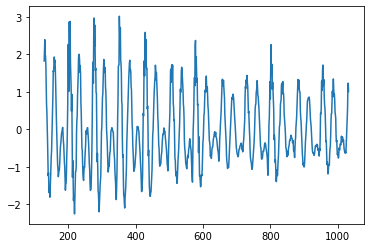

In [33]:
from inv.process import *

ret, c = process_data(
    segment, constants.TIMIT_FS_HZ, prepend=1, max_NP=30, return_full=True
)

plot(c['fulldata'])
plot(range(c['first'], c['last']), c['d'])
plot(c['reference_tracks']/1000)
for idx in c['pulse_estimate']: axvline(idx)
show()
plot(range(c['first'], c['last']), c['d'])
ret

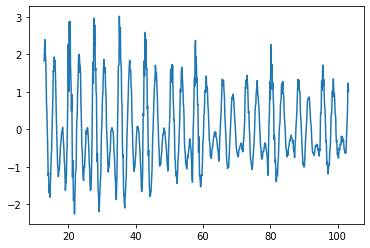

In [34]:
plot(ret['t'], ret['d'])

## Test prior bijector

In [7]:
from dgf.prior import source
from vtr.prior import filter

b = filter.filter_trajectory_bijector(
    ret['NP'], filter.PZ(5), ret['T_estimate'], ret['F_estimate']
)

[Memory]48.1s, 0.8min   : Loading posterior_of_fitted_TFB_values...
[Memory]48.5s, 0.8min   : Loading run_nested...
[Memory]49.0s, 0.8min   : Loading get_vtrformants_training_data...
[Memory]66.2s, 1.1min   : Loading run_nested...
[Memory]67.0s, 1.1min   : Loading run_nested...
[Memory]67.8s, 1.1min   : Loading run_nested...
[Memory]68.6s, 1.1min   : Loading run_nested...
[Memory]70.1s, 1.2min   : Loading get_aplawd_training_pairs...
[Memory]70.8s, 1.2min   : Loading get_aplawd_training_pairs...
[Memory]101.6s, 1.7min  : Loading run_nested...
[Memory]103.0s, 1.7min  : Loading run_nested...
[Memory]104.4s, 1.7min  : Loading run_nested...
[Memory]105.8s, 1.8min  : Loading run_nested...
[Memory]108.1s, 1.8min  : Loading get_vtrformants_training_data...


Test the noise sigma prior (bijector). We put a mean at -20 dB and floor it at the noise floor. Relative uncertainty is 100% leading to a nois power dB of roughly -20 +/- 7.5 dB.

(-21.09183617725781, 7.53997207447859)

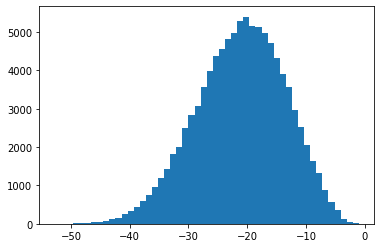

In [8]:
from inv import model

b = model.noise_sigma_bijector()

noise_sigmas = b.forward(randn(100000))

noise_power_dbs = 20*np.log10(noise_sigmas)

hist(noise_power_dbs, bins=50);

np.mean(noise_power_dbs), np.std(noise_power_dbs)

In [54]:
hyper = dict(
    meta = dict(
        noiseless_estimates = False,
        c = constants.BOUNDARY_FACTOR,
        rho = .5, # Peak picking
        inference_method = "nested_sampling",
        inference_method_options = {}
    ),
    data = ret,
    source = next(source._yield_all_configs()),
    filter = filter.PZ(10)
)

hyper['source']['use_oq'] = True

model.ndim(hyper)

573

In [55]:
hyper

{'meta': {'noiseless_estimates': False,
  'c': 2.0,
  'rho': 0.5,
  'inference_method': 'nested_sampling',
  'inference_method_options': {}},
 'data': {'fulldata': array([ 0.50221794,  0.38402314,  0.0772603 , ..., -0.18704388,
         -0.07515514,  0.26516573]),
  'fullt': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.184e+02, 1.185e+02,
         1.186e+02]),
  'fs': 10000.0,
  'd': array([ 1.82062847,  2.12823236,  2.38724878,  1.98870845,  1.96008135,
          1.72701612,  1.16927776,  0.67233766,  0.47048145,  0.1165405 ,
         -0.29615253, -0.80439418, -1.23678747, -1.15811015, -1.60167492,
         -1.69354948, -1.52549007, -1.80950783, -1.57912742, -1.3183686 ,
         -1.02129335, -0.72052813, -0.57392965, -0.17803656,  0.31355026,
          0.5436334 ,  0.9431711 ,  1.5595763 ,  1.53096318,  1.73836367,
          1.92541099,  1.77472328,  1.8405634 ,  1.62948215,  1.25219693,
          0.73254819,  0.37689916,  0.06341443, -0.32487301, -0.69640077,
         -0.97046587,

In [11]:
bfilter = filter.filter_trajectory_bijector(
    hyper['data']['NP'],
    hyper['filter'],
    hyper['data']['T_estimate'],
    hyper['data']['F_estimate'],
    hyper['meta']['noiseless_estimates']
)

[Memory]156.7s, 2.6min  : Loading posterior_of_fitted_TFB_values...
[Memory]157.1s, 2.6min  : Loading run_nested...


In [57]:
w = randn(model.ndim(hyper))

b = model.theta_trajectory_bijector(hyper)

b.forward(w)

[Memory]805.8s, 13.4min : Loading posterior_of_fitted_lf_values...
[Memory]805.8s, 13.4min : Loading run_nested...
[Memory]805.9s, 13.4min : Loading posterior_of_fitted_TFB_values...
[Memory]805.9s, 13.4min : Loading run_nested...


{'noise_sigma': DeviceArray([0.14788163], dtype=float64),
 'source': DeviceArray([[0.80734957, 0.07341288, 7.59182816, 0.78659014],
              [1.1078927 , 0.07815417, 7.27969003, 0.79951331],
              [0.91957774, 0.10363234, 7.06225194, 0.83962596],
              [1.13897901, 0.081427  , 7.37391866, 0.76787106],
              [1.2907957 , 0.07296564, 7.31754799, 0.76441229],
              [1.37539847, 0.07577356, 7.5077392 , 0.74520613],
              [1.35776799, 0.1245249 , 7.0101427 , 0.77711509],
              [1.43987394, 0.09715456, 7.61084849, 0.64010743],
              [1.70834861, 0.13781694, 7.27203759, 0.75296028],
              [1.82863473, 0.12967313, 8.19540812, 0.72056795],
              [2.34451135, 0.10371708, 7.77082557, 0.66128122],
              [2.53475122, 0.12852559, 7.59288734, 0.71095132],
              [2.84302636, 0.16532139, 7.86523794, 0.67700166]],            dtype=float64),
 'filter': DeviceArray([[ 153.78433567,  248.32096916,  374.18270837,  7

In [58]:
-b.forward_log_det_jacobian(w)

DeviceArray(-558.52283346, dtype=float64)

In [63]:
prior = model.theta_trajectory_prior(hyper)
theta = prior.sample(seed=jaxkey())
theta, prior.log_prob(theta)

[Memory]1119.3s, 18.7min: Loading posterior_of_fitted_lf_values...
[Memory]1119.3s, 18.7min: Loading run_nested...
[Memory]1119.3s, 18.7min: Loading posterior_of_fitted_TFB_values...
[Memory]1119.3s, 18.7min: Loading run_nested...


({'noise_sigma': DeviceArray([0.02937409], dtype=float64),
  'source': DeviceArray([[2.41451195, 0.02590032, 7.03978652, 0.98765032],
               [2.53698394, 0.03386577, 7.53238461, 0.98842077],
               [2.87505906, 0.02839559, 7.58123849, 0.9898522 ],
               [2.92270747, 0.03015393, 7.5694324 , 0.99204037],
               [2.56112133, 0.02768418, 7.92426213, 0.99298386],
               [3.02288328, 0.02297164, 7.6835347 , 0.99206937],
               [2.77391731, 0.02422691, 7.60038958, 0.99263733],
               [2.65260328, 0.02437879, 7.85829437, 0.99433905],
               [2.59724624, 0.02154119, 7.61500846, 0.99478814],
               [2.42502376, 0.02715046, 7.48097715, 0.99669133],
               [2.51703051, 0.03460984, 7.45831936, 0.99705486],
               [2.58190134, 0.02709167, 7.42866012, 0.9961993 ],
               [3.42929847, 0.04786246, 7.81305618, 0.996926  ]],            dtype=float64),
  'filter': DeviceArray([[ 725.50570599,  893.29390993, 12

In [66]:
model.ndim_f(hyper)

208

In [67]:
model.model_basis_functions(theta, hyper)

In [92]:
# test vmap: works
def test(theta, offset):
    for k, v in theta.items():
        print(k, v.shape)
    return offset
    return theta['noise_sigma']

in_axes = {
    'noise_sigma': None,
    'source': 0,
    'filter': 0,
    'g': 0
}

# DONT USE THIS; just a dummy example
offset = np.cumsum(theta['source'][:,2])

jax.vmap(test, in_axes=(in_axes, 0))(theta, offset)

filter (20,)
g (20,)
noise_sigma (1,)
source (4,)


DeviceArray([ 7.03978652, 14.57217114, 22.15340962, 29.72284202,
             37.64710416, 45.33063886, 52.93102844, 60.78932281,
             68.40433127, 75.88530842, 83.34362778, 90.7722879 ,
             98.58534408], dtype=float64)

In [100]:
xy = theta['filter'][0,:]
x, y = xy.split(2)

g = theta['g'][0,:]

func = hyper['filter'].pole_coefficients

func(x, y, g)

array([ -1.69386294+1.89949005e-01j,  -0.1223405 -6.84566953e-02j,
        45.1670738 +1.61081660e+01j,  -0.10653612+3.14893762e-01j,
        -1.11984957+1.66661660e+00j,   0.11816532-2.58275051e-01j,
       -50.09061691-2.30168498e+02j,   9.31431683+2.03122502e+02j,
         0.45500098+1.66661072e-01j,  -4.17294061+3.60112396e+00j])

In [103]:
jax.jit(func)(x, y, g)

TracerArrayConversionError: The numpy.ndarray conversion method __array__() was called on the JAX Tracer object Traced<ShapedArray(float64[10,10])>with<DynamicJaxprTrace(level=0/1)>
The error occurred while tracing the function pole_coefficients at /home/marnix/thesis/py/vtr/prior/polezero.py:104 for jit. This concrete value was not available in Python because it depends on the values of the arguments 'x' and 'y'.
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerArrayConversionError

In [ ]:
def test2(a, x):
    if x > 1:
        ret